In [163]:
#project 2
from sklearn.cluster import KMeans
import pandas as pd
from pathlib import Path
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt


In [162]:
#Read CSV
Path="Resources/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
price_df= pd.read_csv(Path)
price_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,232527.0,...,1124579.0,1119261.0,1114733.0,1112570.0,1113554.0,1108906.0,1104331.0,1098915.0,1089614.0,1090168.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,208780.0,...,488778.0,489319.0,490664.0,492714.0,495483.0,498200.0,500780.0,503294.0,505577.0,508007.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,184917.0,...,913735.0,916274.0,916593.0,920113.0,931353.0,934916.0,934687.0,930893.0,934775.0,945772.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,199929.0,...,336901.0,337728.0,338452.0,339876.0,341435.0,343897.0,346910.0,351188.0,355336.0,360190.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,281068.0,...,629766.0,629807.0,630985.0,632529.0,635442.0,638288.0,641416.0,644506.0,647307.0,650905.0


In [14]:
#Filter dataframe
price_df=price_df.drop(columns=["RegionID","SizeRank","RegionName","RegionType","StateName","Metro","CountyName"]).copy()
price_df

,State,City,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,NY,New York,232527.0,231079.0,231156.0,231131.0,231660.0,232303.0,232189.0,233004.0,...,1124579.0,1119261.0,1114733.0,1112570.0,1113554.0,1108906.0,1104331.0,1098915.0,1089614.0,1090168.0
1,IL,Chicago,208780.0,208625.0,208220.0,208086.0,207527.0,207709.0,207498.0,208100.0,...,488778.0,489319.0,490664.0,492714.0,495483.0,498200.0,500780.0,503294.0,505577.0,508007.0
2,NY,New York,184917.0,184955.0,185058.0,185717.0,186675.0,187460.0,187721.0,187799.0,...,913735.0,916274.0,916593.0,920113.0,931353.0,934916.0,934687.0,930893.0,934775.0,945772.0
3,TX,Katy,199929.0,200176.0,199980.0,198794.0,197659.0,196995.0,197755.0,197444.0,...,336901.0,337728.0,338452.0,339876.0,341435.0,343897.0,346910.0,351188.0,355336.0,360190.0
4,IL,Chicago,281068.0,280811.0,280293.0,280152.0,279477.0,279565.0,279073.0,279632.0,...,629766.0,629807.0,630985.0,632529.0,635442.0,638288.0,641416.0,644506.0,647307.0,650905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30338,OR,Central Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,147808.0,149015.0,149286.0,149493.0,149872.0,151352.0,152961.0,156051.0,160039.0,164643.0
30339,TX,Texarkana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49084.0,48557.0,48263.0,48361.0,48416.0,48625.0,49064.0,49603.0,50003.0,50320.0
30340,MA,Groton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,387810.0,387823.0,387806.0,388207.0,389813.0,391532.0,393895.0,393194.0,392171.0,393842.0
30341,LA,Choudrant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,200140.0,199806.0,199449.0,199659.0,199228.0,198112.0,196824.0,196220.0,195117.0,192702.0


In [15]:
#extract only CA
ca_price_df=price_df[price_df["State"]=="CA"].dropna()
ca_price_df

,State,City,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
13,CA,San Francisco,333727.0,332205.0,331788.0,330713.0,330535.0,330277.0,330447.0,331116.0,...,1217984.0,1210221.0,1204887.0,1201422.0,1198273.0,1185486.0,1174127.0,1158873.0,1147199.0,1132611.0
21,CA,Hawthorne,175125.0,175464.0,175837.0,176510.0,177126.0,177562.0,177885.0,177949.0,...,705157.0,707157.0,712324.0,720071.0,728462.0,736058.0,743278.0,749048.0,754975.0,761751.0
42,CA,Los Angeles,177917.0,178299.0,178039.0,177720.0,177240.0,176933.0,177205.0,177218.0,...,1503466.0,1509602.0,1519048.0,1529894.0,1539059.0,1546118.0,1554489.0,1562880.0,1574875.0,1585343.0
86,CA,Alameda,183651.0,182684.0,182409.0,181685.0,181500.0,180861.0,180260.0,179867.0,...,1076034.0,1075570.0,1077038.0,1086790.0,1097824.0,1113689.0,1128931.0,1140118.0,1146929.0,1159571.0
92,CA,San Francisco,285314.0,283786.0,282878.0,281548.0,280920.0,280286.0,279710.0,280674.0,...,1613069.0,1604729.0,1598217.0,1598760.0,1598630.0,1584055.0,1571072.0,1557327.0,1551159.0,1540788.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28314,CA,Descanso,167009.0,167041.0,166451.0,165746.0,163654.0,161941.0,160548.0,159442.0,...,421338.0,419075.0,420041.0,422969.0,428102.0,433128.0,436726.0,441366.0,447249.0,454018.0
28858,CA,Woody,75013.0,74805.0,74747.0,74867.0,74980.0,75373.0,75777.0,76507.0,...,270301.0,271855.0,274658.0,276649.0,278883.0,281229.0,284578.0,289189.0,293217.0,298109.0
29239,CA,Big Creek,167163.0,165555.0,163763.0,160645.0,158543.0,157741.0,156650.0,155933.0,...,425119.0,429843.0,436166.0,444691.0,452153.0,457815.0,465162.0,475755.0,487674.0,497245.0
29946,CA,Soda Springs,249238.0,248776.0,248922.0,248505.0,247658.0,247208.0,248418.0,250449.0,...,668444.0,673014.0,684696.0,696142.0,704255.0,707302.0,711321.0,718469.0,728562.0,737694.0


In [16]:
#merge rows based on cities and average the prices
group_ca_price_df=ca_price_df.groupby("City").mean()
group_ca_price_df.head()

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
City,,,,,,,,,,,,,,,,,,,,,
Acampo,140984.0,140052.0,139210.0,137199.0,135968.0,134731.0,133674.0,132725.0,132323.0,132714.0,...,578398.0,579087.0,586502.0,596085.0,609658.0,621864.0,635954.0,651729.0,669519.0,690364.0
Acton,189127.0,189955.0,190421.0,192058.0,192887.0,193723.0,193852.0,194166.0,194213.0,194046.0,...,631413.0,632602.0,638001.0,646720.0,657574.0,667301.0,676827.0,685957.0,694479.0,704614.0
Agoura Hills,279318.0,279063.0,278997.0,279112.0,279307.0,279831.0,280114.0,280615.0,280728.0,280858.0,...,906226.0,906699.0,911689.0,920025.0,929294.0,937900.0,945400.0,952679.0,959266.0,966665.0
Aguanga,107007.0,107761.0,107857.0,108942.0,108802.0,108793.0,108989.0,110434.0,112001.0,113153.0,...,395458.0,397939.0,401105.0,404194.0,407710.0,412951.0,418102.0,424011.0,429866.0,436823.0
Alameda,205976.5,205057.0,204658.5,203799.0,203365.0,202690.5,202019.5,201599.5,201412.0,201588.0,...,1042890.5,1042391.5,1045308.5,1055554.5,1065870.5,1077678.5,1089846.0,1098396.5,1104088.0,1114772.5


In [175]:
yoy_price_list=[]
total_price_change_year_df=pd.DataFrame()
total_price_change_year_df=pd.DataFrame()
for i in range(1997,2022):
    current_year=group_ca_price_df[f"{i}-01-31"]
    past_year=group_ca_price_df[f"{i-1}-01-31"]
    yoy_price_df[i]=current_year
    total_price_change_year_df[i-1]=(current_year-past_year)/past_year

total_price_change_year_df

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
City,,,,,,,,,,,,,,,,,,,,,
Acampo,-0.057042,-0.016722,0.108645,0.094624,0.142164,0.194160,0.095538,0.217853,0.268392,0.213889,...,-0.012615,0.103311,0.239407,0.103421,0.175641,0.094588,0.106772,0.050103,-0.007639,0.175647
Acton,0.023397,0.004872,0.105920,0.120225,0.068959,0.080048,0.185977,0.187572,0.241996,0.207119,...,-0.067780,0.108590,0.142079,0.052299,0.083193,0.054645,0.054857,0.034580,0.015928,0.123060
Agoura Hills,0.005066,0.034367,0.098719,0.116886,0.108672,0.089206,0.158281,0.199641,0.234678,0.144237,...,-0.060624,0.083090,0.199289,-0.012574,0.056572,0.039106,0.078524,0.002318,0.012258,0.079699
Aguanga,0.097022,-0.003527,0.023082,0.112446,0.064823,0.105409,0.177403,0.143844,0.297591,0.162282,...,-0.009195,0.044737,0.257681,0.154305,0.058337,0.065403,0.125427,0.055889,0.028707,0.092897
Alameda,-0.018007,0.084504,0.117512,0.130523,0.217126,0.077453,0.112450,0.091385,0.186295,0.098309,...,-0.032600,0.191848,0.221739,0.032675,0.146029,0.061798,0.104849,0.020485,0.051593,0.061743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yermo,0.026755,0.041187,0.107574,-0.055910,0.047868,0.093657,0.021160,0.095317,0.223381,0.097798,...,0.059268,0.041414,0.018172,-0.061795,0.025580,0.097739,0.093344,0.062009,-0.028917,0.198005
Yorba Linda,0.005735,0.057806,0.120721,0.098225,0.114894,0.098309,0.168886,0.187816,0.233161,0.124031,...,-0.051532,0.084538,0.189304,-0.004777,0.054890,0.034113,0.048680,0.004160,0.008529,0.098525
Yountville,0.026181,0.051757,0.085840,0.202506,0.219614,0.163492,0.121663,0.114952,0.128773,0.097187,...,-0.078548,0.154645,0.157849,0.081715,0.051237,0.063866,0.114542,0.117676,-0.012964,0.100581


In [18]:
#transpose_yoy_price_change_df=yoy_price_change_df.transpose()
#transpose_yoy_price_change_df.hvplot.line(figsize=(50,15),rot=90)

In [234]:
total_price_change_year_df.dtypes

1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
dtype: object

In [235]:
t_total_price_change_year_df=total_price_change_year_df.T
one_cycle=t_total_price_change_year_df.iloc[15:25]

In [282]:
# Find when the peek happened 
peek_df=pd.DataFrame()
peek_df["peek_year"] = one_cycle.idxmax()
peek_df["pct_increase"]=one_cycle.max()
peek_df["bottom_year"] = one_cycle.idxmin()
peek_df["Year_Gap"]= peek_df["peek_year"]-bottom_df["bottom_year"]

peek_df

,peek_year,pct_increase,bottom_year,Year_Gap
City,,,,
Acampo,2013,0.239407,2011,2
Acton,2013,0.142079,2011,2
Agoura Hills,2013,0.199289,2011,2
Aguanga,2013,0.257681,2011,2
Alameda,2013,0.221739,2011,2
...,...,...,...,...
Yermo,2020,0.198005,2014,6
Yorba Linda,2013,0.189304,2011,2
Yountville,2013,0.157849,2011,2


In [283]:
#elbow method, find SSE
k_rng=range(1,13)
sse=[]
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(peek_df[["peek_year","pct_increase"]])
    sse.append(km.inertia_)

C:\Users\Might\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


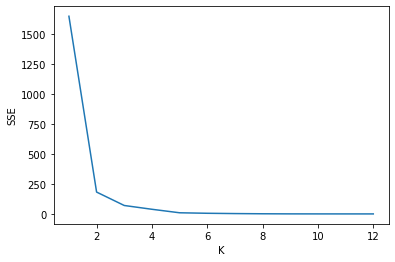

In [284]:
#plot elbow
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_rng,sse)

In [285]:
km_model = KMeans(n_clusters=3)
km_model

KMeans(n_clusters=3)

In [286]:
y_predictd=km_model.fit_predict(peek_df[["peek_year","pct_increase"]])
#y_predictd
peek_df["cluster"]=y_predictd
peek_df

,peek_year,pct_increase,bottom_year,Year_Gap,cluster
City,,,,,
Acampo,2013,0.239407,2011,2,0
Acton,2013,0.142079,2011,2,0
Agoura Hills,2013,0.199289,2011,2,0
Aguanga,2013,0.257681,2011,2,0
Alameda,2013,0.221739,2011,2,0
...,...,...,...,...,...
Yermo,2020,0.198005,2014,6,1
Yorba Linda,2013,0.189304,2011,2,0
Yountville,2013,0.157849,2011,2,0


,x,y
0,2012.947664,0.211933
1,2020.000000,0.167539
2,2016.344828,0.185861


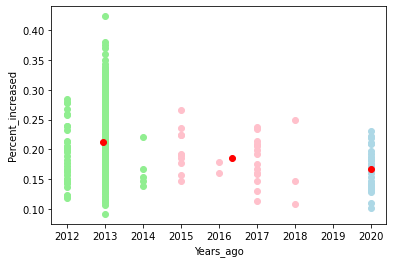

In [287]:
cluster_0=peek_df[peek_df.cluster==0]
cluster_1=peek_df[peek_df.cluster==1]
cluster_2=peek_df[peek_df.cluster==2]
plt.scatter(cluster_0.peek_year,cluster_0.pct_increase, color="lightgreen")
plt.scatter(cluster_1.peek_year,cluster_1.pct_increase, color="lightblue")
plt.scatter(cluster_2.peek_year,cluster_2.pct_increase, color="pink")
plt.xlabel("Years_ago")
plt.ylabel("Percent_increased")
#find cluster centers for 
km_model.cluster_centers_
center_points_df=pd.DataFrame(km_model.cluster_centers_,columns=["x","y"])
display(center_points_df)
plt.scatter(center_points_df.x,center_points_df.y, color="red")

In [305]:
find_df=peek_df[peek_df["cluster"]==0]
find_df

,peek_year,pct_increase,bottom_year,Year_Gap,cluster
City,,,,,
Acampo,2013,0.239407,2011,2,0
Acton,2013,0.142079,2011,2,0
Agoura Hills,2013,0.199289,2011,2,0
Aguanga,2013,0.257681,2011,2,0
Alameda,2013,0.221739,2011,2,0
...,...,...,...,...,...
Wrightwood,2013,0.220242,2011,2,0
Yorba Linda,2013,0.189304,2011,2,0
Yountville,2013,0.157849,2011,2,0


In [306]:
find1_df=peek_df[peek_df["cluster"]==1]
find1_df

,peek_year,pct_increase,bottom_year,Year_Gap,cluster
City,,,,,
Bradley,2020,0.136823,2011,9,1
Caliente,2020,0.147390,2011,9,1
Cutler,2020,0.159480,2011,9,1
El Dorado,2020,0.187357,2011,9,1
Farmersville,2020,0.182395,2011,9,1
Firebaugh,2020,0.138868,2011,9,1
Huron,2020,0.219451,2011,9,1
Inyokern,2020,0.208704,2011,9,1
Jenner,2020,0.110163,2011,9,1


In [307]:
find2_df=peek_df[peek_df["cluster"]==2]
find2_df

,peek_year,pct_increase,bottom_year,Year_Gap,cluster
City,,,,,
Bodfish,2017,0.167119,2011,6,2
Campbell,2017,0.213613,2011,6,2
Campo,2017,0.130123,2011,6,2
Coronado,2015,0.190091,2011,4,2
Cupertino,2017,0.198649,2019,-2,2
Descanso,2017,0.113368,2011,6,2
East Foothills,2017,0.158021,2011,6,2
El Segundo,2015,0.147600,2011,4,2
El Sobrante,2015,0.235914,2011,4,2


In [304]:
cluster2_df=peek_df.loc["Bethel Island"]
cluster2_df

peek_year       2013.000000
pct_increase       0.212162
bottom_year     2019.000000
Year_Gap          -6.000000
cluster            0.000000
Name: Bethel Island, dtype: float64

In [291]:
#bottom_df=pd.DataFrame()
#bottom_df["bottom_year"] = one_cycle.idxmin()
#bottom_df["pct_increase"]=one_cycle.min()
#bottom_df

,bottom_year,pct_increase
City,,
Acampo,2011,-0.012615
Acton,2011,-0.067780
Agoura Hills,2011,-0.060624
Aguanga,2011,-0.009195
Alameda,2011,-0.032600
...,...,...
Yermo,2014,-0.061795
Yorba Linda,2011,-0.051532
Yountville,2011,-0.078548


In [255]:
#elbow method, find SSE
#k_rng=range(1,13)
#sse=[]
#for k in k_rng:
    #km= KMeans(n_clusters=k)
    #km.fit(bottom_df[["bottom_year","pct_increase"]])
    #sse.append(km.inertia_)

C:\Users\Might\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


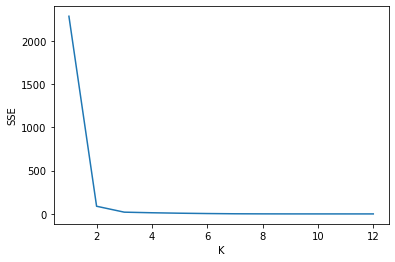

In [250]:
#plot elbow
#plt.xlabel("K")
#plt.ylabel("SSE")
#plt.plot(k_rng,sse)

In [256]:
#km_bottom_model = KMeans(n_clusters=2)
#km_bottom_model

KMeans(n_clusters=2)

In [260]:
#y2_predictd=km_model.fit_predict(bottom_df[["bottom_year","pct_increase"]])
#y_predictd
#bottom_df["cluster"]=y_predictd
#bottom_df

,bottom_year,pct_increase,cluster
City,,,
Acampo,2011,-0.012615,0
Acton,2011,-0.067780,0
Agoura Hills,2011,-0.060624,0
Aguanga,2011,-0.009195,0
Alameda,2011,-0.032600,0
...,...,...,...
Yermo,2014,-0.061795,1
Yorba Linda,2011,-0.051532,0
Yountville,2011,-0.078548,0


Text(0, 0.5, 'Percent_increased')

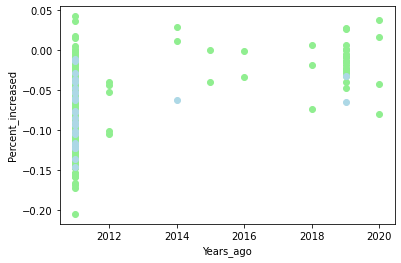

In [265]:
#cluster_0=bottom_df[bottom_df.cluster==0]
#cluster_1=bottom_df[bottom_df.cluster==1]
#plt.scatter(cluster_0.bottom_year,cluster_0.pct_increase, color="lightgreen")
#plt.scatter(cluster_1.bottom_year,cluster_1.pct_increase, color="lightblue")
#plt.xlabel("Years_ago")
#plt.ylabel("Percent_increased")
#find cluster centers for 


In [267]:
#bottom_df[bottom_df["bottom_year"]==2019]

,bottom_year,pct_increase,cluster
City,,,
Alamo,2019,-0.022585,0
Belmont,2019,-0.008566,0
Bethel Island,2019,-0.031776,0
Brentwood,2019,-0.004289,0
Cupertino,2019,-0.038248,2
Danville,2019,-0.018879,0
Diablo,2019,-0.014327,0
Discovery Bay,2019,0.001667,0
Guerneville,2019,-0.047068,0


In [30]:
#transpose_yoy_price_change_df=yoy_price_change_df.transpose()
#recent_growing_cities_df=transpose_yoy_price_change_df[past_growing_cities_percent_change.index]
#recent_growing_cities_df.hvplot.line()

In [31]:
#See the growth trend. 
#transpose_yoy_price_change_df=yoy_price_change_df.transpose()
#recent_growing_cities_df=transpose_yoy_price_change_df[recent_growing_cities_percent_change.index]
#recent_growing_cities_df.hvplot.line()

In [32]:
#transposed_group_ca_price_df=group_ca_price_df.transpose()
#transposed_group_ca_price_df

In [42]:
#percent_change of prices
#index_dates=["2006-01-31","2011-01-31","2016-01-31","2021-01-31"]
#percent_change_df=pd.DataFrame(transposed_group_ca_price_df, index=index_dates)
#percent_change_df

NameError: name 'transposed_group_ca_price_df' is not defined

In [43]:
city_list=list(percent_change_df.columns)
five_years=[]
ten_years=[]
fifteen_years=[]
for city in city_list:
    five_years.append((percent_change_df[city][3]-percent_change_df[city][2])/percent_change_df[city][2])
    ten_years.append((percent_change_df[city][3]-percent_change_df[city][1])/percent_change_df[city][1])
    fifteen_years.append((percent_change_df[city][3]-percent_change_df[city][0])/percent_change_df[city][0])
print (five_years,ten_years,fifteen_years)

NameError: name 'percent_change_df' is not defined

In [35]:
#five years
#five_years_array=np.array(five_years)
#round_to_thousands_5=np.around(five_years_array,4)
#five_years_rounded=list(round_to_thousands_5)
#ten years
#ten_years_array=np.array(ten_years)
#round_to_thousands_10=np.around(ten_years_array,4)
#ten_years_rounded=list(round_to_thousands_10)
#fifteen years
#fifteen_years_array=np.array(fifteen_years)
#round_to_thousands_15=np.around(fifteen_years_array,4)
#fifteen_years_rounded=list(round_to_thousands_15)


In [36]:
#perchange of 5, 10, 15 years in prices
#index_names=["5_years","10_years","15_years"]
#growth_df=pd.DataFrame(index=index_names)
#for i in range(len(city_list)):
    #growth_df[city_list[i]]=[five_years_rounded[i] , ten_years_rounded[i] , fifteen_years_rounded[i]]
#save as csv
#growth_df=growth_df.transpose()
#growth_df

In [48]:
group_ca_price_df

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
City,,,,,,,,,,,,,,,,,,,,,
Acampo,140984.0,140052.0,139210.0,137199.0,135968.0,134731.0,133674.0,132725.0,132323.0,132714.0,...,578398.0,579087.0,586502.0,596085.0,609658.0,621864.0,635954.0,651729.0,669519.0,690364.0
Acton,189127.0,189955.0,190421.0,192058.0,192887.0,193723.0,193852.0,194166.0,194213.0,194046.0,...,631413.0,632602.0,638001.0,646720.0,657574.0,667301.0,676827.0,685957.0,694479.0,704614.0
Agoura Hills,279318.0,279063.0,278997.0,279112.0,279307.0,279831.0,280114.0,280615.0,280728.0,280858.0,...,906226.0,906699.0,911689.0,920025.0,929294.0,937900.0,945400.0,952679.0,959266.0,966665.0
Aguanga,107007.0,107761.0,107857.0,108942.0,108802.0,108793.0,108989.0,110434.0,112001.0,113153.0,...,395458.0,397939.0,401105.0,404194.0,407710.0,412951.0,418102.0,424011.0,429866.0,436823.0
Alameda,205976.5,205057.0,204658.5,203799.0,203365.0,202690.5,202019.5,201599.5,201412.0,201588.0,...,1042890.5,1042391.5,1045308.5,1055554.5,1065870.5,1077678.5,1089846.0,1098396.5,1104088.0,1114772.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yermo,50982.0,51029.0,51277.0,51597.0,51736.0,51702.0,51778.0,52001.0,52542.0,52581.0,...,104682.0,105776.0,107451.0,109418.0,111394.0,113084.0,114160.0,115908.0,117595.0,119032.0
Yorba Linda,277661.5,278599.0,278297.5,278177.5,277584.5,277249.0,276953.0,276730.0,276745.0,277338.5,...,899596.5,901726.5,906673.0,915621.5,924061.5,932747.5,943370.5,955721.0,967445.5,977942.5
Yountville,283982.0,284941.0,286029.0,287480.0,288283.0,288651.0,289074.0,289265.0,290161.0,289579.0,...,1021512.0,1026279.0,1031642.0,1036727.0,1043509.0,1052750.0,1064810.0,1078147.0,1090787.0,1102429.0


In [155]:
t_group_ca_price_df=group_ca_price_df.T


In [156]:

MoM_pct_change=t_group_ca_price_df.pct_change()
MoM_pct_change


City,Acampo,Acton,Agoura Hills,Aguanga,Alameda,Alamo,Albany,Alhambra,Aliso Viejo,Alpine,...,Woodbridge,Woodlake,Woodland,Woody,Wrightwood,Yermo,Yorba Linda,Yountville,Yucaipa,Yucca Valley
1996-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-02-29,-0.006611,0.004378,-0.000913,0.007046,-0.004464,-0.007174,-0.006065,-0.000260,0.002139,0.001892,...,-0.002356,-0.003078,-0.003645,-0.002773,-0.004803,0.000922,0.003376,0.003377,-0.004156,-0.003163
1996-03-31,-0.006012,0.002453,-0.000237,0.000891,-0.001943,-0.006727,-0.004559,0.000576,-0.001899,0.000406,...,-0.003824,0.006523,-0.000644,-0.000775,-0.006846,0.004860,-0.001082,0.003818,-0.002355,-0.003570
1996-04-30,-0.014446,0.008597,0.000412,0.010060,-0.004200,-0.013945,-0.005294,0.001113,-0.002838,0.000687,...,-0.004992,0.005836,-0.003111,0.001605,-0.009556,0.006241,-0.000431,0.005073,-0.004624,-0.008099
1996-05-31,-0.008972,0.004316,0.000699,-0.001285,-0.002130,-0.017979,-0.002427,0.001198,-0.004047,-0.000297,...,-0.002951,0.008519,-0.000991,0.001509,-0.008978,0.002694,-0.002132,0.002793,-0.002972,-0.006468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,0.020021,0.014792,0.009261,0.012855,0.011078,0.015215,0.011320,0.008170,0.007836,0.015197,...,0.014272,0.009920,0.016045,0.008412,0.012111,0.015171,0.009400,0.008856,0.009425,0.011809
2020-11-30,0.022658,0.014275,0.007997,0.012474,0.011290,0.013032,0.011743,0.007104,0.009036,0.014717,...,0.015858,0.014083,0.016222,0.011908,0.011286,0.009515,0.011389,0.011456,0.010599,0.015025
2020-12-31,0.024805,0.013489,0.007699,0.014133,0.007846,0.010475,0.007953,0.007419,0.011167,0.013215,...,0.014796,0.014699,0.015139,0.016203,0.014156,0.015312,0.013092,0.012525,0.012673,0.019390
2021-01-31,0.027297,0.012424,0.006914,0.013809,0.005182,0.016473,0.004490,0.005409,0.010619,0.013969,...,0.016085,0.016029,0.008578,0.013929,0.015437,0.014555,0.012268,0.011724,0.012485,0.019480


In [109]:
five_years_MoM_pct_change= MoM_pct_change["2016-01-31":]
five_years_MoM_pct_change

City,Acampo,Acton,Agoura Hills,Aguanga,Alameda,Alamo,Albany,Alhambra,Aliso Viejo,Alpine,...,Woodbridge,Woodlake,Woodland,Woody,Wrightwood,Yermo,Yorba Linda,Yountville,Yucaipa,Yucca Valley
2016-01-31,0.009895,0.002529,0.004216,0.006737,0.010410,0.000306,0.007348,0.004018,0.002248,0.012308,...,0.001508,0.001211,0.010428,0.003101,0.007043,0.006345,0.001506,-0.003303,0.007877,0.008276
2016-02-29,0.004050,0.007191,0.004468,0.009126,0.012577,-0.005078,0.010530,0.005584,0.004941,0.002674,...,-0.001724,-0.002419,0.006358,0.002975,0.006970,-0.001059,0.004516,-0.001836,0.003793,0.004862
2016-03-31,0.007081,0.003729,0.001510,0.008046,0.002217,-0.001963,-0.000321,0.002114,0.002543,-0.003435,...,0.005790,0.008413,0.003148,0.005320,0.010712,0.011424,0.002472,-0.005930,0.005443,0.006173
2016-04-30,0.009556,0.012034,0.006783,0.005947,0.003310,-0.002142,0.004305,0.006479,0.001689,-0.002615,...,0.010093,0.006919,0.001955,0.001428,0.009180,0.015426,0.001488,0.004612,0.004252,0.003616
2016-05-31,0.020515,0.006153,0.001969,0.009264,0.005101,-0.000764,0.004059,0.003992,0.006103,0.000495,...,0.018241,0.009706,0.006799,0.006908,0.009449,0.012647,0.004289,0.004217,0.007381,0.005020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,0.020021,0.014792,0.009261,0.012855,0.011078,0.015215,0.011320,0.008170,0.007836,0.015197,...,0.014272,0.009920,0.016045,0.008412,0.012111,0.015171,0.009400,0.008856,0.009425,0.011809
2020-11-30,0.022658,0.014275,0.007997,0.012474,0.011290,0.013032,0.011743,0.007104,0.009036,0.014717,...,0.015858,0.014083,0.016222,0.011908,0.011286,0.009515,0.011389,0.011456,0.010599,0.015025
2020-12-31,0.024805,0.013489,0.007699,0.014133,0.007846,0.010475,0.007953,0.007419,0.011167,0.013215,...,0.014796,0.014699,0.015139,0.016203,0.014156,0.015312,0.013092,0.012525,0.012673,0.019390
2021-01-31,0.027297,0.012424,0.006914,0.013809,0.005182,0.016473,0.004490,0.005409,0.010619,0.013969,...,0.016085,0.016029,0.008578,0.013929,0.015437,0.014555,0.012268,0.011724,0.012485,0.019480


0.2692332995818104